### ASSIGNMENT 1

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
# import warnings
# warnings.filterwarnings("ignore",category=FutureWarning)
# warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"C:\Users\sharo\Desktop\AI\AI Library\EDA\Assignments\Big_mart_Sales_Prediction\train.csv")

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [8]:
df.shape

(8523, 12)

In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df.Item_Weight.fillna(df["Item_Weight"].median(),inplace=True)

In [11]:
mod=df["Outlet_Size"].mode()

In [12]:
mod

0    Medium
dtype: object

In [13]:
df["Outlet_Size"].fillna(mod,inplace=True)


In [14]:
df.isnull().sum()


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
## outlayer

In [17]:
num_col=df.select_dtypes(include=np.number).columns
num_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [18]:
obj_col=df.select_dtypes(include=np.object).columns
obj_col

C:\Users\sharo\AppData\Local\Temp/ipykernel_9064/3491428484.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obj_col=df.select_dtypes(include=np.object).columns


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [19]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
desc_col=[]
continuos_col=[]

for col in num_col:
    if df[col].nunique()>20:
        continuos_col.append(col)
    else:
        desc_col.append(col)

In [21]:
continuos_col

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

In [22]:
desc_col

['Outlet_Establishment_Year']

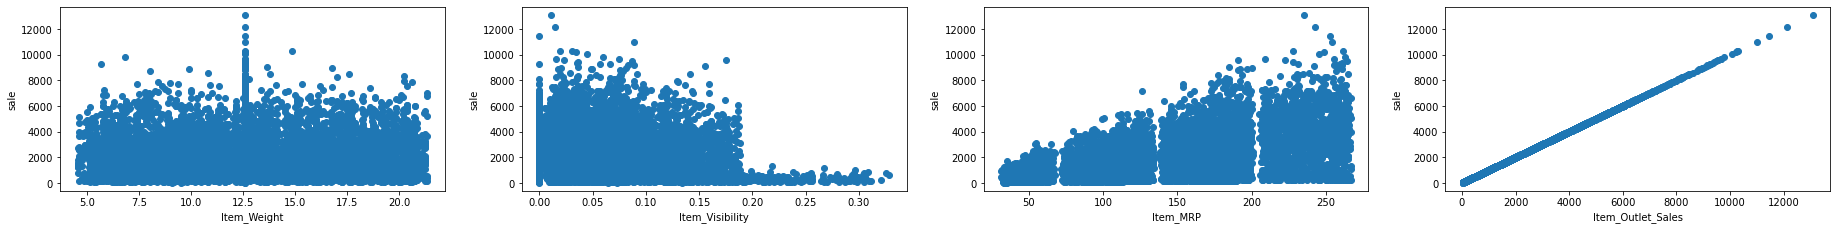

In [23]:
j=0
plt.figure(figsize=(40,40))
for column in continuos_col:
    plt.subplot(10,5,j+1)
    plt.scatter(df[column],df['Item_Outlet_Sales'])   # continuous  aayath kondan scatter plote upayokichath
    plt.xlabel(column)
    plt.ylabel("sale")
    j+=1

In [24]:
for col in continuos_col:
    upper_limit=df[col].mean()+df[col].std()*3
    lower_limit=df[col].mean()-df[col].std()*3

    df.loc[(df[col]> upper_limit),col] =upper_limit
    df.loc[(df[col]< lower_limit),col] =lower_limit

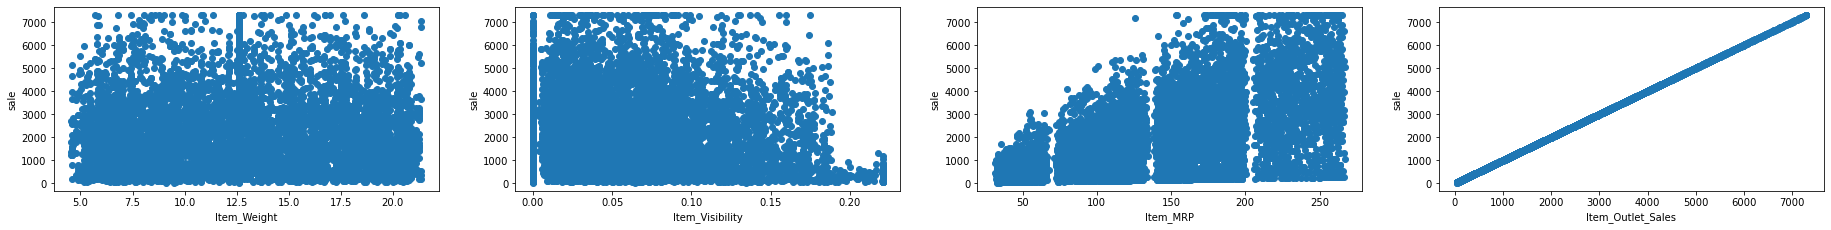

In [25]:
j=0
plt.figure(figsize=(40,40))
for column in continuos_col:
    plt.subplot(10,5,j+1)
    plt.scatter(df[column],df['Item_Outlet_Sales'])   # continuous  aayath kondan scatter plote upayokichath
    plt.xlabel(column)
    plt.ylabel("sale")
    j+=1

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [28]:
obj_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [29]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
from collections import defaultdict
default_encoder=defaultdict(LabelEncoder)

In [32]:
obj_df=df[obj_col]

In [33]:
obj_df

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [34]:
fit=obj_df.apply(lambda x:default_encoder[x.name].fit_transform(x))

In [35]:
fit

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,1,4,9,1,0,1
1,8,2,14,3,1,2,2
2,662,1,10,9,1,0,1
3,1121,2,6,0,3,2,0
4,1297,1,9,1,0,2,1
...,...,...,...,...,...,...,...
8518,370,1,13,1,0,2,1
8519,897,2,0,7,3,1,1
8520,1357,1,8,6,2,1,1
8521,681,2,13,3,1,2,2


In [36]:
default_encoder["Item_Fat_Content"].transform(["Low Fat"])

array([1])

In [37]:
df.drop(obj_col,axis=1,inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 333.1 KB


In [39]:
# updated_train=pd.concat([train,fit],axis=1)

updated_df=pd.concat([df,fit],axis=1)

In [40]:
updated_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0.016047,249.8092,1999,3735.1380,156,1,4,9,1,0,1
1,5.92,0.019278,48.2692,2009,443.4228,8,2,14,3,1,2,2
2,17.50,0.016760,141.6180,1999,2097.2700,662,1,10,9,1,0,1
3,19.20,0.000000,182.0950,1998,732.3800,1121,2,6,0,3,2,0
4,8.93,0.000000,53.8614,1987,994.7052,1297,1,9,1,0,2,1


In [41]:
# correlation

cor_df=updated_df.corr()

In [42]:
cor_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Weight,1.000000,-0.014326,0.024951,0.007739,0.010340,0.044218,-0.017255,0.028038,-0.007666,-0.011120,0.001958,-0.009973
Item_Visibility,-0.014326,1.000000,-0.001102,-0.068569,-0.124278,-0.026749,0.036485,-0.035858,-0.096297,0.084577,-0.025130,-0.165138
Item_MRP,0.024951,-0.001102,1.000000,0.005020,0.572033,0.012853,-0.000876,0.032651,0.003319,-0.002473,0.000232,-0.001975
Outlet_Establishment_Year,0.007739,-0.068569,0.005020,1.000000,-0.042671,-0.012772,-0.000189,0.004970,0.079035,0.470343,-0.089216,-0.122304
Item_Outlet_Sales,0.010340,-0.124278,0.572033,-0.042671,1.000000,0.002839,0.009672,0.017307,0.166349,-0.173880,0.086254,0.400809
Item_Identifier,0.044218,-0.026749,0.012853,-0.012772,0.002839,1.000000,-0.098114,-0.017973,-0.008602,0.000855,0.003656,-0.001178
Item_Fat_Content,-0.017255,0.036485,-0.000876,-0.000189,0.009672,-0.098114,1.000000,-0.115958,-0.002357,-0.004795,-0.004102,-0.004214
Item_Type,0.028038,-0.035858,0.032651,0.004970,0.017307,-0.017973,-0.115958,1.000000,0.001656,0.000827,0.003084,0.003053
Outlet_Identifier,-0.007666,-0.096297,0.003319,0.079035,0.166349,-0.008602,-0.002357,0.001656,1.000000,0.053224,-0.716176,0.099873
Outlet_Size,-0.011120,0.084577,-0.002473,0.470343,-0.173880,0.000855,-0.004795,0.000827,0.053224,1.000000,-0.290216,-0.432062


In [43]:
cor_df["Item_Outlet_Sales"]

Item_Weight                  0.010340
Item_Visibility             -0.124278
Item_MRP                     0.572033
Outlet_Establishment_Year   -0.042671
Item_Outlet_Sales            1.000000
Item_Identifier              0.002839
Item_Fat_Content             0.009672
Item_Type                    0.017307
Outlet_Identifier            0.166349
Outlet_Size                 -0.173880
Outlet_Location_Type         0.086254
Outlet_Type                  0.400809
Name: Item_Outlet_Sales, dtype: float64

In [44]:
new_cor=abs(cor_df["Item_Outlet_Sales"]).sort_values(ascending=False)  #absolute value -ve pokan
new_cor

Item_Outlet_Sales            1.000000
Item_MRP                     0.572033
Outlet_Type                  0.400809
Outlet_Size                  0.173880
Outlet_Identifier            0.166349
Item_Visibility              0.124278
Outlet_Location_Type         0.086254
Outlet_Establishment_Year    0.042671
Item_Type                    0.017307
Item_Weight                  0.010340
Item_Fat_Content             0.009672
Item_Identifier              0.002839
Name: Item_Outlet_Sales, dtype: float64

In [224]:
new_cor[new_cor > 0.4]    # ini ithan required coloms

Item_Outlet_Sales    1.000000
Item_MRP             0.572033
Outlet_Type          0.400809
Name: Item_Outlet_Sales, dtype: float64

In [225]:
final_col=new_cor[new_cor > 0.4].index 

In [226]:
final_col

Index(['Item_Outlet_Sales', 'Item_MRP', 'Outlet_Type'], dtype='object')

In [227]:
final_df=updated_df[final_col]
final_df

,Item_Outlet_Sales,Item_MRP,Outlet_Type
0,3735.1380,249.8092,1
1,443.4228,48.2692,2
2,2097.2700,141.6180,1
3,732.3800,182.0950,0
4,994.7052,53.8614,1
...,...,...,...
8518,2778.3834,214.5218,1
8519,549.2850,108.1570,1
8520,1193.1136,85.1224,1
8521,1845.5976,103.1332,2


In [228]:
y=final_df["Item_Outlet_Sales"]
X=final_df.drop(["Item_Outlet_Sales"],axis=1)

In [229]:
X.head()

,Item_MRP,Outlet_Type
0,249.8092,1
1,48.2692,2
2,141.6180,1
3,182.0950,0
4,53.8614,1


In [230]:
# we are going to do linear regression

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [231]:
from sklearn.preprocessing import StandardScaler    # first y scale down cheyyathe predict cheyyunnu
sc_X=StandardScaler()

sc_X.fit_transform(X_train) #numpy array

array([[-0.40189546, -1.51340146],
       [-0.61928426, -0.26268071],
       [-0.20253536,  2.2387608 ],
       ...,
       [ 1.5257291 , -0.26268071],
       [-0.3811361 , -0.26268071],
       [-0.73573148, -0.26268071]])

In [232]:
X_train=pd.DataFrame(sc_X.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(sc_X.transform(X_test),columns=X_train.columns)


In [233]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [234]:
lr.fit(X_train,y_train)

LinearRegression()

In [235]:
y_pred=lr.predict(X_test)
y_pred[0:11] 

array([1051.58640263,  483.16450323,  472.89868138, 4175.38218293,
       2879.38564391,  324.98849725, 4722.13316769, 2852.60116495,
       2250.73485257, 3628.61185156,  596.5119028 ])

In [236]:
y_test.head(10)

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
4304     865.5400
2132    4613.9940
1385    2410.8618
5239    1948.1308
6516    1937.4780
Name: Item_Outlet_Sales, dtype: float64

In [237]:
#test accuracy


lr.score(X_test,y_test)

0.4983124517562082

In [238]:
# train accuracy

lr.score(X_train,y_train)  

0.4844655581960361

In [239]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1337635.147306992

In [240]:
# we are now scale downing y

from sklearn.preprocessing import StandardScaler
sc_y=StandardScaler()

y_train=pd.DataFrame(sc_y.fit_transform(np.array(y_train).reshape(-1,1)))

y_test=pd.DataFrame(sc_y.transform(np.array(y_test).reshape(-1,1)))

In [241]:
lr_scale=LinearRegression()

lr_scale.fit(X_train,y_train)

LinearRegression()

In [242]:
y_pred_scaled=lr_scale.predict(X_test)
y_pred_scaled[0:11]

array([[-0.68182667],
       [-1.02166277],
       [-1.02780028],
       [ 1.18576246],
       [ 0.41093938],
       [-1.1162297 ],
       [ 1.5126424 ],
       [ 0.39492604],
       [ 0.03509491],
       [ 0.85887094],
       [-0.95389701]])

In [243]:
y_test.head(10)

,0
0,-0.268420
1,-1.097170
2,-1.084830
3,2.144188
4,0.098586
5,-0.793056
6,1.447990
7,0.130828
8,-0.145820
9,-0.152188


In [244]:
lr_scale.score(X_test,y_test)

0.4983124517562082

In [245]:
lr_scale.score(X_train,y_train)

0.4844655581960361

In [246]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred_scaled)    #mse valare low aayi

0.47811798162640734